# Analysing the evolution 
## DEPRECATED

In [107]:
import pandas as pd
import numpy as np
from collections import defaultdict 

In [101]:
df = pd.read_csv("test.csv")
df.head()
GENS = 200

In [117]:
def clean_parents(item):
    item = list(eval(item))
    return pd.Series([item[0], item[1]])

df[["parent1","parent2"]]=df["parent"].apply(clean_parents)
df.head()
# df.index = df.idx


,iter,idx,n_gen,n_iter,rank,crowding,parent,mutate,mutate_rate,parent1,parent2
0,1,1_99,1,1,0,inf,"['0', '0']",NaN,NaN,0,0
1,1,1_72,1,1,1,inf,"['0', '0']",NaN,NaN,0,0
2,1,1_83,1,1,2,inf,"['0', '0']",NaN,NaN,0,0
3,1,1_54,1,1,3,inf,"['0', '0']",NaN,NaN,0,0
4,1,1_46,1,1,4,inf,"['0', '0']",NaN,NaN,0,0


In [110]:
dftmp = df[df["idx"]=="1_99"] 
print(dftmp[:4])
v,c = np.unique(df.idx,return_counts=True)
print(len(v)) # número único de nodos

     iter   idx  n_gen  n_iter  rank  crowding      parent mutate mutate_rate  \
0       1  1_99      1       1     0       inf  ['0', '0']    NaN         NaN   
100     2  1_99      1       1     0       inf  ['0', '0']    NaN         NaN   
200     3  1_99      1       1     0       inf  ['0', '0']    NaN         NaN   
300     4  1_99      1       1     0       inf  ['0', '0']    NaN         NaN   

    parent1 parent2  
0         0       0  
100       0       0  
200       0       0  
300       0       0  


835

In [118]:
mask = df.groupby(by=["idx"],as_index=False)["iter"].min()
mask[:4]

,idx,iter
0,100_0,100
1,100_1,100
2,100_2,100
3,100_3,100


In [121]:
cdf = pd.merge(mask,df,on=["idx","iter"],how="inner")
cdf              

,idx,iter,n_gen,n_iter,rank,crowding,parent,mutate,mutate_rate,parent1,parent2
0,100_0,100,100,100,50,inf,"['62_1', '61_1']",True,"[-2.197767464297746, -15.299222217847047]",62_1,61_1
1,100_1,100,100,100,77,inf,"['95_2', '98_1']",True,"[-5.265935995818083, 11.52594120280652]",95_2,98_1
2,100_2,100,100,100,43,inf,"['61_1', '62_1']",True,[-2.9111350278415014],61_1,62_1
3,100_3,100,100,100,48,inf,"['98_1', '95_2']",True,[0],98_1,95_2
4,101_0,101,101,101,41,inf,"['88_0', '74_0']",True,[-23.543605972482933],88_0,74_0
...,...,...,...,...,...,...,...,...,...,...,...
830,99_3,99,99,99,2,inf,"['88_3', '74_2']",True,"[-2.8077747816742455, -3.8740669264628047]",88_3,74_2
831,9_0,9,9,9,0,inf,"['1_78', '1_31']",True,[-4.107121486174251],1_78,1_31
832,9_1,9,9,9,67,inf,"['1_87', '4_3']",True,[5.563634553773303],1_87,4_3
833,9_2,9,9,9,85,inf,"['1_31', '1_78']",True,[0],1_31,1_78


De cara a la visualización es interesante solo dejar el nodo con la iter más bajo.

In [123]:
import networkx as nx
edgesp1 = zip(cdf["parent1"],cdf["idx"])
edgesp2 = zip(cdf["parent2"],cdf["idx"])

G = nx.Graph()
G.add_edges_from(edgesp1)
G.add_edges_from(edgesp2)
G.remove_node("0")

In [124]:
cdf['degree'] = cdf['idx'].map(G.degree)

In [125]:
cdf.head()

,idx,iter,n_gen,n_iter,rank,crowding,parent,mutate,mutate_rate,parent1,parent2,degree
0,100_0,100,100,100,50,inf,"['62_1', '61_1']",True,"[-2.197767464297746, -15.299222217847047]",62_1,61_1,2
1,100_1,100,100,100,77,inf,"['95_2', '98_1']",True,"[-5.265935995818083, 11.52594120280652]",95_2,98_1,2
2,100_2,100,100,100,43,inf,"['61_1', '62_1']",True,[-2.9111350278415014],61_1,62_1,2
3,100_3,100,100,100,48,inf,"['98_1', '95_2']",True,[0],98_1,95_2,2
4,101_0,101,101,101,41,inf,"['88_0', '74_0']",True,[-23.543605972482933],88_0,74_0,2


In [130]:
dftmp = cdf[cdf["n_gen"]==1].sort_values(by="rank")
dftmp

,idx,iter,n_gen,n_iter,rank,crowding,parent,mutate,mutate_rate,parent1,parent2,degree
494,1_99,1,1,1,0,inf,"['0', '0']",NaN,NaN,0,0,11
465,1_72,1,1,1,1,inf,"['0', '0']",NaN,NaN,0,0,6
477,1_83,1,1,1,2,inf,"['0', '0']",NaN,NaN,0,0,0
445,1_54,1,1,1,3,inf,"['0', '0']",NaN,NaN,0,0,2
436,1_46,1,1,1,4,inf,"['0', '0']",NaN,NaN,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
437,1_47,1,1,1,95,inf,"['0', '0']",NaN,NaN,0,0,0
485,1_90,1,1,1,96,inf,"['0', '0']",NaN,NaN,0,0,0
423,1_34,1,1,1,97,inf,"['0', '0']",NaN,NaN,0,0,0
463,1_70,1,1,1,98,inf,"['0', '0']",NaN,NaN,0,0,0


In [134]:
posX, posY = dict(),dict()
for gen in range(GENS):
    dftmp = cdf[cdf["n_gen"]==gen].sort_values(by="rank")
    for element in range(len(dftmp)):
        nodeID = dftmp["idx"].iloc[element]
        posX[nodeID] = float(element)+1
        posY[nodeID] = -float(gen)+2
    

In [135]:
iteration_att = dict(zip(cdf.idx,cdf.iter))
rank_att = dict(zip(cdf.idx,cdf["rank"]))
nx.set_node_attributes(G,values=iteration_att,name="iter")
nx.set_node_attributes(G,values=rank_att,name="rank")

nx.set_node_attributes(G,values=posX,name="posx")
nx.set_node_attributes(G,values=posY,name="posy")


In [136]:
nx.write_gexf(G, "test.gexf")
# on Gephy::Layout
# % which dot
# /opt/homebrew/bin/dot


## Indicadores

Esperanza de vida de un individuo

In [180]:
import matplotlib.pyplot as plt 

In [156]:
df = pd.read_csv("test.csv")
df.head()
GENS = 200
def clean_parents(item):
    item = list(eval(item))
    return pd.Series([item[0], item[1]])

df[["parent1","parent2"]]=df["parent"].apply(clean_parents)

In [166]:
mask = df.groupby(by=["idx"],as_index=False)["iter"].agg([min,max])
mask["lifeIter"] = mask["max"]-mask["min"]

In [173]:
dfMutates = df[["idx","mutate"]].drop_duplicates()
dfMutates.fillna(False,inplace=True)
dfMutates


,idx,mutate
0,1_99,False
1,1_72,False
2,1_83,False
3,1_54,False
4,1_46,False
...,...,...
19825,199_2,True
19830,199_3,True
19904,200_2,True
19929,200_0,True


In [182]:
df2 = pd.merge(mask,dfMutates,on=["idx"],how="inner")
print(len(df2[df2["mutate"]==False]))
df2

169


,idx,min,max,lifeIter,mutate
0,100_0,100,113,13,True
1,100_1,100,104,4,True
2,100_2,100,115,15,True
3,100_3,100,113,13,True
4,101_0,101,116,15,True
...,...,...,...,...,...
830,99_3,99,151,52,True
831,9_0,9,63,54,True
832,9_1,9,16,7,True
833,9_2,9,12,3,True


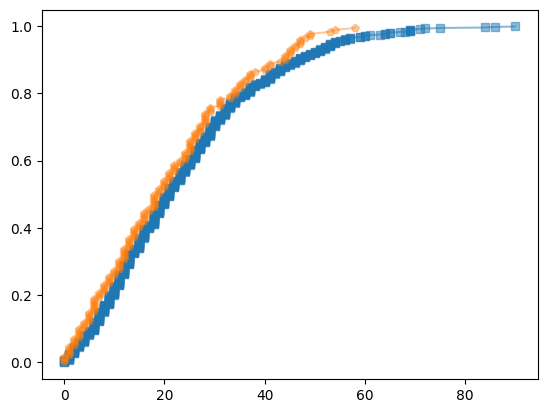

In [193]:
def get_cdf(data):
    N = len(data)
    x = np.sort(data)
    y = np.arange(N)/float(N)
    return x,y

x,y = get_cdf(df2["lifeIter"].values)
xm,ym = get_cdf(df2[df2["mutate"]==True]["lifeIter"])
xnm,ynm = get_cdf(df2[df2["mutate"]==False]["lifeIter"])
# plt.plot(x, y, marker='o',markersize=10) 
plt.plot(xm, ym, marker='s',alpha=0.5) 
plt.plot(xnm, ynm, marker='p',alpha=0.4) 



In [194]:
df[df.iter==GENS]

,iter,idx,n_gen,n_iter,rank,crowding,parent,mutate,mutate_rate,parent1,parent2
19900,200,193_2,193,193,0,inf,"['168_0', '179_1']",True,"[1.511419659996374, 6.310092605197786, 1.38826...",168_0,179_1
19901,200,175_2,175,175,1,inf,"['165_3', '173_3']",True,[0],165_3,173_3
19902,200,194_1,194,194,2,inf,"['181_3', '193_3']",True,"[-5.952780010494777, -1.4810395229830808]",181_3,193_3
19903,200,187_1,187,187,3,inf,"['168_0', '172_3']",True,[-9.335611060840764],168_0,172_3
19904,200,200_2,200,200,4,inf,"['195_0', '149_1']",True,[0],195_0,149_1
...,...,...,...,...,...,...,...,...,...,...,...
19995,200,147_3,147,147,87,inf,"['141_0', '108_3']",True,"[1.350025389256493, 9.442520122231546]",141_0,108_3
19996,200,150_2,150,150,88,inf,"['136_3', '128_2']",True,[0],136_3,128_2
19997,200,159_0,159,159,88,inf,"['150_2', '147_0']",True,[0],150_2,147_0
19998,200,191_3,191,191,89,inf,"['166_2', '140_0']",True,[0.17601566431217347],166_2,140_0
